# EN.553.436/646 Homework 2
Follow these submission guidelines or your answers may not be graded:
1. Your PDF should be legible.
2. No code or comment should go outside the margins of your PDF.
3. Your PDF should contain page breaks.
4. Your problems should be marked in Gradescope.

## 1 (10 pts.)
1. (5 pts.) Import [`water.csv`](https://www.kaggle.com/adityakadiwal/water-potability?select=water_potability.csv) as a `pandas` `DataFrame`. Drop all rows with `NaN`. Store `potability` as target variable `y` and the other variables as predictors `X`. 
2. (5 pts.) Apply `sklearn.preprocessing.StandardScalar` to the predictors. Using `sklearn.model_selection.train_test_split` split the data into training and test sets `X_train, X_test, y_train, y_test` with 20% test size and `random_state=553`.

In [3]:
# Import...
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read water.csv and drop NaN
water = pd.read_csv('water.csv')
water_df = pd.DataFrame(water).dropna()
display(water_df)

# Store Potability for y, and others for x
y = water_df['Potability']
x = water_df.iloc[:,0:-1]

# sklearn: Apply StandardScalar on x, and Split for test and train sets
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(x)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=553)



,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


## 2  (10 pts.)
1. (5 pts.) Manually implement linear discriminant analysis on the training data using `numpy`. Assume flat priors. 
2. (5 pts.) Print the test accuracy from your implementation of flat-prior LDA versus the test accuracy from the `sklearn.discriminant_analysis.LinearDiscriminantAnalysis` implementation of flat-prior LDA. The accuracies should be the same.

In [81]:
# Implement linear discreminant analysis on X_train MANUALLY
# Calculate Cov Matrix
Y = np.array(y)
cov_mtx = np.cov(X_train, rowvar = False)
# Calculate 2 means for 2 classes
X_0, X_1 = X_train[y_train==1], X_train[y_train==0]
u_0, u_1 = np.mean(X_0, axis = 0), np.mean(X_1, axis = 0)
# Calculate mean diff
u_mean_diff = (u_0 - u_1).T.dot((u_0 - u_1))
#Calculate inverse cov matrix for all
cov_mtx_inv = np.linalg.inv(cov_mtx)
# Objective function:
def obj(x, u_0, u_1, cov_mtx_inv):
    x_t = x.T
    diff = u_0 - u_1
    return cov_mtx_inv.dot(diff).dot(x_t) - 1/2 * diff.T.dot(cov_mtx_inv).dot(diff)
# Predict
obj_arr = obj(X_test, u_0, u_1, cov_mtx_inv)
pred_arr = []
for pred in obj_arr:
    if pred > 0:
        pred_arr.append(1)
    else:
        pred_arr.append(0)
# Test accuracy for manual implementation
score = 0
y_test_arr = np.array(y_test)
for i in range(len(y_test)):
    if pred_arr[i] == y_test_arr[i]:
        score += 1
        
accuracy_manual = score/int(len(y_test))
print('LDA Prediction Accuracy from Manual Implementation:', accuracy_manual)

# Test accuracy from sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
LDA_model=LDA(priors=[0.5,0.5])
accuracy_LDA=LDA_model.fit(X_train,y_train).score(X_test,y_test)

print('LDA Prediction Accuracy from Sklearn library:',accuracy_LDA)


LDA Prediction Accuracy from Manual Implementation: 0.5161290322580645
LDA Prediction Accuracy from Sklearn library: 0.5136476426799007


## 3  (10 pts.)

1. (5 pts.) Plot the mean 10-fold CV scores on the training set of $k\text{NN}$ models for $k \in [1, 2, \ldots, 10, 20, \ldots, 200]$. Make sure that your data are shuffled for the CV using `random_state=553`, and make sure CV is run on the same data partition for each $k$. 
2. (5 pts.) Explain the trend of your plot in one to three sentences. An explanation that is too vague will not receive full credit.

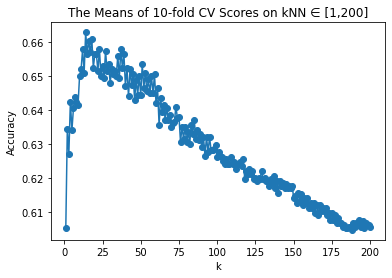

In [6]:
# Create 10-fold CV model
from sklearn.model_selection import KFold
k_fold = KFold(n_splits=10, random_state=553, shuffle=True)

# Convert y to np array
Y = np.array(y)

# for 𝑘∈[1,2,…,10,20,…,200], apply kNN models with 10-folds CV
from sklearn.neighbors import KNeighborsClassifier
knn_scores = []
k_fold_score = []
for num_neighbors in range(1,201):
    knn = KNeighborsClassifier(n_neighbors = num_neighbors)
    for train_index, test_index in k_fold.split(X):
        X_train_new, X_test_new, y_train_new, y_test_new = X[train_index], X[test_index], Y[train_index], Y[test_index]
        knn.fit(X_train_new, y_train_new)
        k_fold_score.append(knn.score(X_test_new, y_test_new))
    knn_scores.append(np.mean(k_fold_score))
    k_fold_score = []
    
plt.plot(np.linspace(1, 200, 200), knn_scores, 'o-')
plt.title('The Means of 10-fold CV Scores on kNN ∈ [1,200]')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

### Explanation:
We saw that the accuracy of the 10-folded kNN model first rises steeply as the value of k increase, and has best performance at around k = 25, but drops as the value of k continue to increase.<br><br>
This is because the value of k could not be too high or too low as the principle concept of its classification depends on the k number of the nearest neighbors. If k, the number of the nearest neighbors, is too low, the classification does not have enough information to make an accurate decision. If k is too high, the classification is vulnerable to noises from other data sets that are outside of the correct one.<br><br>

## 4  (10 pts.)
1. (5 pts.) Repeat part 3.1 for a random forest model, varying `n_estimators` in $[1, 2, \ldots, 10, 20, \ldots, 100]$. Set `random_state=636` for the random forest. 
2. (5 pts.) Explain the trend of your plot in one to three sentences. An explanation that is too vague will not receive full credit.

In [ ]:
# Create 10-fold CV model
from sklearn.model_selection import KFold
k_fold = KFold(n_splits=10, random_state=553, shuffle=True)

# Convert y to np array
Y = np.array(y)

# for n_estimators∈[1,2,…,10,20,…,100], apply random forest models with 10-folds CV
from sklearn.ensemble import RandomForestClassifier
random_forest_scores = []
k_fold_score = []
for num_estimators in range(1,101):
    random_forest_model = RandomForestClassifier(n_estimators = num_estimators, random_state = 636)
    for train_index, test_index in k_fold.split(X):
        X_train_new, X_test_new, y_train_new, y_test_new = X[train_index], X[test_index], Y[train_index], Y[test_index]
        random_forest_model.fit(X_train_new, y_train_new)
        k_fold_score.append(random_forest_model.score(X_test_new, y_test_new))
    random_forest_scores.append(np.mean(k_fold_score))
    k_fold_score = []
    
plt.plot(np.linspace(1, 100, 100), random_forest_scores, 'o-')
plt.title('The Means of 10-fold CV Scores on Random Forest with n-Estimators ∈ [1,100]')
plt.xlabel('n-estimators')
plt.ylabel('Accuracy')
plt.show()

### Explanation:
With an increasing number of trees (estimators) in the random forest, the acurracy increases. This is beacause, in general, the more trees you use the better the results. <br><br>
However, the trend of improvement decreases as the number of estimators continues to increase. <br><br>
This is because the uncorrelatedness between the trees start fading, meaning that the additional trees are providing existing or similar decisions.
Also, with an exceeding number of estimators, the benefit in prediction performance from learning more trees will not compensate the cost in computation power to support more trees.